In [ ]:
# 사용할 라이브러리 설치
!pip install request
!pip install BeautifulSoup4

In [49]:
# 나눔 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,072 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

## 크롤링
클래스로 데이터를 수집할 수 도 있다.

In [12]:
# 사용할 라이브러리 추가
import requests
from bs4 import BeautifulSoup as bs # import와 from의 차이는 import는 하나의 클래스를 from은 여러 개의 클래스 중 하나를 말한다.

res = requests.get('https://dhlottery.co.kr/common.do?method=main') # 200은 인터넷 프로토콜 자체에서 수신을 잘했다고 나타내 주는 것이다.
soup = bs(res.content, 'html.parser') # html 태그를 인식을 시켜준다. -> 분류를 해준다.
result = soup.select('.ball_645')

for num in result:
  print(num.text, end = '번 ')


7번 16번 25번 29번 35번 36번 28번 

In [110]:
# pandas의 series 형태로 변형을 해서 bar 그래프로 시각화 하기
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

array = []
for num in result:
  array.append(int(num.text)) # 이렇게 하면되겠다는 생각이 들었지만 int()를 적용시킬 생각은 못했다.

sr = pd.Series(array)

plt.bar(sr.index, sr) # x값을 어떻게 적용시켜야 그래프가 나오는 지에 대한 이해도 부족, 간단하게 index를 적용해주면 된다.
plt.show()

ValueError: ignored

## 뉴스 수집

In [56]:
!pip install newspaper3k

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 211 kB 31.2 MB/s 
     |████████████████████████████████| 81 kB 8.9 MB/s 
     |████████████████████████████████| 93 kB 2.7 MB/s 
     |████████████████████████████████| 7.4 MB 54.7 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13552 sha256=a327ff60a3aca3aede61c71e95bf5bd630adead38ba5da0af87283a778746c90
  Stored in directory: /root/.cache/pip/wheels/99/74/83/8fac1c8d9c648cfabebbbffe97a889f6624817f3aa0bbe6c09
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3354 sha256=b32fdbd92d1185393ee06fa87a0198aad2e538406545bd6f8b7d5631285604b9
  Stored in directory: /root/.cache/pip/wheels/b6/09/68/a9f15498ac02c23dde29f18745bc6a6f574ba4ab41861a3575
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398405 sha256=aa69ba3fc4e7ef9d5fadd2bc89790af876fca5a590821f26

In [58]:
import newspaper as news

link = 'https://n.news.naver.com/mnews/article/015/0004789828?sid=105'
article = news.Article(link, language='ko')
article.download()
article.parse()
print(article.text) # 본문만 추출한다.

KT는 자체 개발한 메타버스 솔루션 'KT 메타라운지'를 기업·교육기관·공공기관 등에 제공한다고 21일 발표했다.KT 메타라운지는 B2B, B2G 고객 대상 맞춤형 메타버스 솔루션이다. KT그룹의 정보기술(IT) 서비스 전문 기업인 KT DS와 공동 개발했다. 고객의 필요에 따라 자체 공간과 기능을 제공해 기존 메타버스 플랫폼과 차별성을 뒀다는 설명이다. 대학은 메타버스 강의실을 마련하고, 지방자치단체는 주민 소통 행사를 여는 등 다양한 방식으로 쓸 수 있다.KT 관계자는 "이미 KT가 개발한 공간과 기능에 커스터마이징한 공간과 기능을 추가 제공해 메타버스 서비스를 기획, 제작하는데 소요되는 기간과 비용을 줄일 수 있다"며 "남들과 차별화된 본인들만의 메타버스 공간이 생기는 효과도 있다"고 설명했다.메타라운지는 공유·소통·흐름을 콘셉트로 비즈니스 홀, 아카데미 홀, 콘퍼런스홀 등 3개 건물과 야외 공간으로 구성됐다. 비즈니스 홀에는 행사 진행에 필요한 다양한 기능을 제공하는 MOU 룸을 비롯해 화상회의와 함께 자료 공유, 다운로드 등을 할 수 있는 회의실이 있다.아카데미 홀에선 원활한 강의 진행을 위해 참석자들의 발언·이석·착석을 제어할 수 있다. 공지사항, 채팅, 실시간 화면 등의 기능도 포함됐다. 콘퍼런스홀은 식순 안내, AI 실시간 번역 등 특화 기능을 제공하는 컨퍼런스룸이 있다.야외공간에서는 아바타를 활용한 근접 화상 대화 기능으로 생동감 있는 커뮤니케이션이 가능하다. 마이룸에서 일정 확인 및 빠른 입장, 아바타 꾸미기 등을 할 수 있고 VIP 공간인 마이라운지에서는 회의실처럼 화상회의, 자료 공유 등이 가능하다.메타라운지는 회의록 자동 생성, 실시간 번역, 아바타 추천 생성 등 인공지능(AI) 기반 서비스도 제공한다. 향후에는 비서 역할까지 수행할 수 있는 AI NPC(논 플레이어블 캐릭터) 등도 선보일 예정이다.KT는 메타라운지를 실제 업무에 활용하고 있다. 지난 6월에는 탄소중립녹색성장위원회(GYCC)와 KT 간의 MOU를 메타라운지 MOU 룸에서

In [104]:
# 목록을 beautifulsoup을 이용하여 제목들에서 링크를 가져와서 기사를 수집하는 족족 보여준다.

res = requests.get('https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=105', headers={'User-Agent':'Mozilla/5.0'})
res
soup = bs(res.content, 'html.parser')
result = soup.select('.cluster_text')

linkList = []

for i in result:
  linkList.append(i.a.get('href'))

articleList = []

for link in linkList:
  article = news.Article(link, language='ko')
  article.download()
  article.parse()
  articleList.append(article.text)


## Histogram (히스토그램)


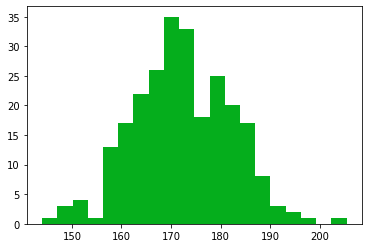

In [86]:
import numpy as np

x = np.random.normal(172, 10, 250)

plt.hist(x, bins=20, color='#05ae1c')
plt.show()

In [90]:
df = pd.read_csv('./sample/anime_genre_top10_pivoted.csv', index_col='genre')
df

,Movie,Music,ONA,OVA,Special,TV
genre,,,,,,
Comedy,7293127.0,20860.0,1477266.0,5614758.0,6659293.0,65420862.0
Action,10224960.0,77054.0,524907.0,5793680.0,3412689.0,63364032.0
Drama,9034099.0,100734.0,188427.0,3043374.0,1915578.0,41011557.0
Romance,5245386.0,42811.0,411331.0,3143167.0,2015820.0,40703388.0
Supernatural,5452779.0,9189.0,192989.0,2696715.0,2336723.0,38956520.0
Fantasy,8019406.0,43962.0,188937.0,2754224.0,2504131.0,34932563.0
Shounen,5698808.0,NaN,97833.0,3861296.0,2591988.0,35532847.0
School,1512533.0,5496.0,523223.0,2417660.0,2661425.0,35489099.0
Adventure,9485223.0,42829.0,70431.0,2373765.0,2052024.0,27529975.0


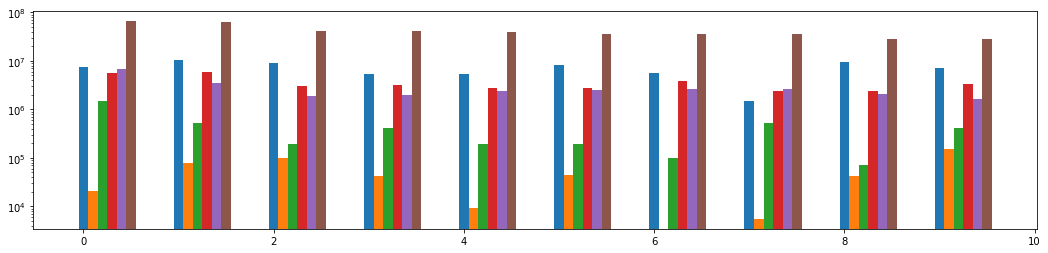

In [93]:
plt.rc('font', family='NanumBarunGothic')
fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot(111)

wt = np.array(range(len(df)))
w = 0.1 # 전체적으로 비교하기 위해선 막대의 굵기가 얇아야 한다.
for i in df.columns:
  ax.bar(wt, df[i], width=w, label=i) # 2가지 이상의 정보를 보고자 할 때
  wt = wt + w
ax.set_yscale('log') # 원래 길었던 갈색의 값을 잘라버린다.
plt.show()

In [94]:
df = pd.read_csv('./sample/anime_master.csv')
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
10070,11095,Zouressha ga Yatte Kita,Adventure,Movie,1,6.06,78
10071,7808,Zukkoke Knight: Don De La Mancha,"Adventure, Comedy, Historical, Romance",TV,23,6.47,172
10072,28543,Zukkoke Sannin-gumi no Hi Asobi Boushi Daisakusen,"Drama, Kids",OVA,1,5.83,50
10073,18967,Zukkoke Sannin-gumi: Zukkoke Jikuu Bouken,"Comedy, Historical, Sci-Fi",OVA,1,6.13,76


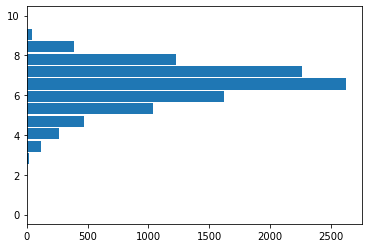

In [102]:
# 데이터가 어디에 치우쳐져 있는 지 확인할 때 많이 쓰인다.
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['rating'], range=(0, 10), rwidth=0.9, bins=16, orientation='horizontal') # rwidth는 여백을 주기 위해서 사용한다.

plt.show()

## Folium 라이브러리 - 지도 활용

In [105]:
# 설치 방법
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [108]:
import folium

seoulMap = folium.Map(location=[37.55, 126.98], zoom_start=12, tiles='Stamen Toner')
seoulMap

In [116]:
df = pd.read_excel('./sample/서울지역 대학교 위치.xlsx', index_col=0)
df.head()

,위도,경도
KAIST 서울캠퍼스,37.592573,127.046737
KC대학교,37.548345,126.854797
가톨릭대학교(성신교정),37.585922,127.004328
가톨릭대학교(성의교정),37.499623,127.006065
감리교신학대학교,37.567645,126.961610


In [118]:
seoulMap = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain', zoom_start=12)

for name, lat, lng in zip(df.index, df.위도, df.경도):
  folium.Marker([lat, lng], popup=name).add_to(seoulMap)

seoulMap

In [119]:
seoulMap = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain', zoom_start=12)

for name, lat, lng in zip(df.index, df.위도, df.경도):
  folium.CircleMarker([lat, lng], 
                      radius=10,
                      color='brown',
                      fill=True,
                      fill_color='coral',
                      fill_opacity=0.7,
                      popup=name).add_to(seoulMap)

seoulMap

In [121]:
import json

df = pd.read_excel('./sample/경기도인구데이터.xlsx')
df.columns = df.columns.map(str)
df.columns

Index(['구분', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')

In [141]:
geo_path = './sample/경기도행정구역경계.json'
# json 파일은 보통 통신으로 많이 받아오는데 오류가 났을 때를 대비하기 위해 try문을 사용
try:
  geo_data = json.load(open(geo_path, encoding='utf-8'))
except:
  geo_data = json.load(open(geo_path, encoding='utf-8-sig'))

g_map = folium.Map(location=[37.5502, 126.982], tiles='Stamen Terrain', zoom_start=9)

year = '2017'

folium.Choropleth(geo_data=geo_data,
                  data=df[year],
                  columns=[df.index, df[year]],
                  fill_color='YlOrRd',
                  fill_opacity=0.7,
                  line_opacity=0.3,
                  threshold_scale=[10000, 100000, 300000, 500000, 700000],
                  key_on='feature.properties.name',
                  ).add_to(g_map)

g_map

In [146]:
df = pd.read_csv('./서울특별시_가로등 위치 정보.csv', encoding='cp949', index_col=0)
df.head()

,위도,경도
관리번호,,
가락지하차도-01,37.495254,127.107417
가락지하차도-02,37.495354,127.107755
가락지하차도-03,37.495443,127.108073
가락지하차도-04,37.495551,127.108410
가락지하차도-05,37.495654,127.108736


In [165]:
df = pd.read_csv('./서울특별시_가로등 위치 정보.csv', encoding='cp949', index_col=0)

grMap = folium.Map(location=[37.5502, 126.982], tiles='Stamen Toner', zoom_start=9)

for name, lat, lng in zip(df.index, df.위도, df.경도):
  folium.CircleMarker([lat, lng],
                      radius=5,
                      fill=True,
                      color='black',
                      fill_color='yellow',
                      fill_opacity=0.7,
                      popup=name).add_to(grMap)

grMap

Output hidden; open in https://colab.research.google.com to view.

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19316 entries, 가락지하차도-01 to 행주IC_05-66
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   위도      19316 non-null  float64
 1   경도      19316 non-null  float64
dtypes: float64(2)
memory usage: 452.7+ KB


In [160]:
df = pd.read_csv('./전라남도 순천시_가로등.csv', encoding='cp949', index_col=0)

grMap = folium.Map(location=[34.95061472474385, 127.48676912044438], tiles='Stamen Toner', zoom_start=9)

for name, lat, lng in zip(df.index, df.위도, df.경도):
  folium.CircleMarker([lat, lng],
                      radius=5,
                      fill=True,
                      color='black',
                      fill_color='yellow',
                      fill_opacity=0.7,
                      popup=name).add_to(grMap)

grMap

Output hidden; open in https://colab.research.google.com to view.

In [162]:
df = pd.read_csv('./전라남도 해남군_가로등정보.csv', encoding='cp949', index_col=0)

grMap = folium.Map(location=[34.95061472474385, 127.48676912044438], tiles='Stamen Toner', zoom_start=9)

for name, lat, lng in zip(df.index, df.위도, df.경도):
  folium.CircleMarker([lat, lng],
                      radius=5,
                      fill=True,
                      color='black',
                      fill_color='yellow',
                      fill_opacity=0.7,
                      popup=name).add_to(grMap)

grMap

Output hidden; open in https://colab.research.google.com to view.

## Seaborn 

In [ ]:
# 라이브러리 설치
!pip install seaborn

In [167]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [168]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


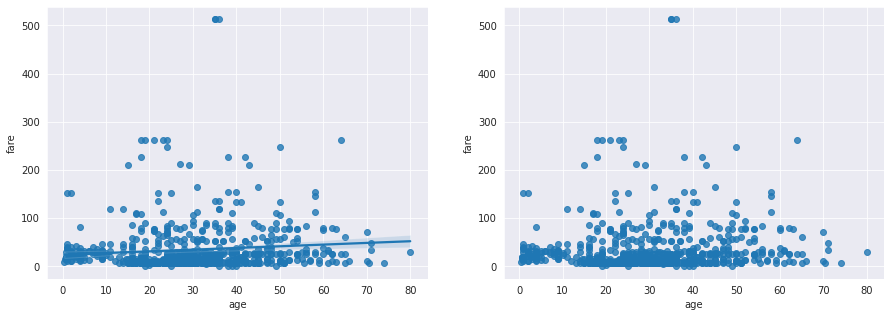

In [172]:
# 희귀선이 있는 산점도 
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1) # 2개 중에 첫번째꺼를 쓰겠다.
ax2 = fig.add_subplot(1, 2, 2)  # 2개 중에 두번째꺼를 쓰겠다.

sns.regplot(x = 'age', y = 'fare', data=titanic, ax=ax1)
sns.regplot(x = 'age', y = 'fare', data=titanic, ax=ax2, fit_reg=False)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


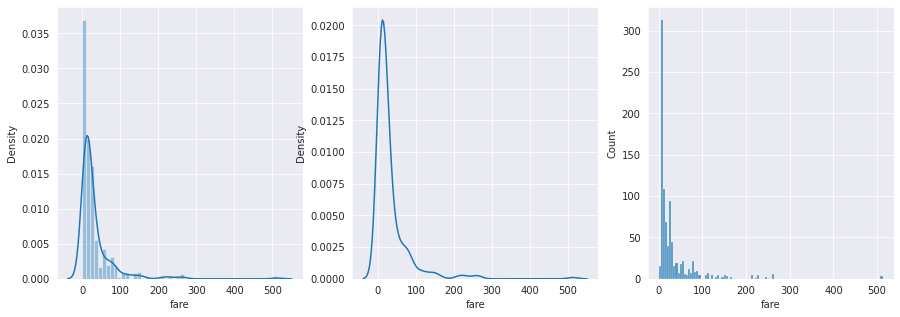

In [175]:
# 히스토그램 / 커널 밀도 그래프
sns.set_style('darkgrid')

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1) # 3개 중에 첫번째꺼를 쓰겠다.
ax2 = fig.add_subplot(1, 3, 2)  # 3개 중에 두번째꺼를 쓰겠다.
ax3 = fig.add_subplot(1, 3, 3)

sns.distplot(titanic['fare'], ax=ax1) # 2개를 더해둔 거 같은 느낌
sns.kdeplot(ax=ax2, x='fare', data=titanic) # 전체적이 그래프의 윤곽이 어떻게 되는 지
sns.histplot(ax=ax3, x='fare', data=titanic) 

plt.show()

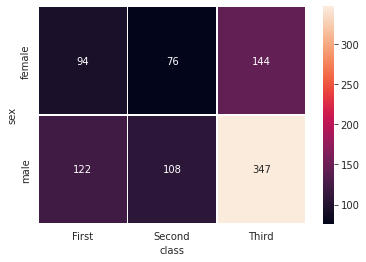

In [177]:
# 히트맵
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')
sns.heatmap(table,
            annot=True,
            fmt='d',
            linewidth=0.5,
            cbar=True)
            
plt.show()